In [7]:
from sklearn.datasets import load_digits
import numpy as np

In [2]:
data = load_digits(as_frame=True)

In [3]:
df = data.frame

In [4]:
X = data.images  # Image data, shape: (1797, 8, 8)
y = data.target 

In [5]:
X = X / 16.0  # Pixel values range from 0 to 16; normalize to [0, 1]

In [8]:
X = np.expand_dims(X, axis=-1)  # Shape: (1797, 8, 8, 1)
X.shape

(1797, 8, 8, 1)

In [9]:
from tensorflow.keras.utils import to_categorical

2025-01-07 23:03:33.501174: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
y = to_categorical(y, num_classes=10)  # Shape: (1797, 10)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
import tensorflow as tf

In [14]:
model = tf.keras.Sequential([
    # Convolutional Layer
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(8, 8, 1)),
    # Pooling Layer
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Flatten Layer
    tf.keras.layers.Flatten(),
    # Fully Connected Layer
    tf.keras.layers.Dense(units=128, activation='relu'),
    # Output Layer
    tf.keras.layers.Dense(units=10, activation='softmax')  # 10 classes for digits 0–9
])

/Users/aayamojha/DWIT-TC/data_science_ml/lesson_3/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 6, 6, 32)       │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,602 (150.79 KB)

 Trainable params: 38,602 (150.79 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.1)

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.3274 - loss: 2.1966 - val_accuracy: 0.7153 - val_loss: 1.8795
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7842 - loss: 1.7361 - val_accuracy: 0.8819 - val_loss: 1.3104
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9168 - loss: 1.1300 - val_accuracy: 0.9028 - val_loss: 0.7762
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9037 - loss: 0.6683 - val_accuracy: 0.8819 - val_loss: 0.4854
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9369 - loss: 0.3988 - val_accuracy: 0.9306 - val_loss: 0.3627
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9280 - loss: 0.3113 - val_accuracy: 0.9444 - val_loss: 0.2860
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9371 - loss: 0.2691 - val_accuracy: 0.9375 - val_loss: 0.2385
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9647 - loss: 0.1904 - val_accuracy: 0.9583 - val_lo

In [19]:
import matplotlib.pyplot as plt

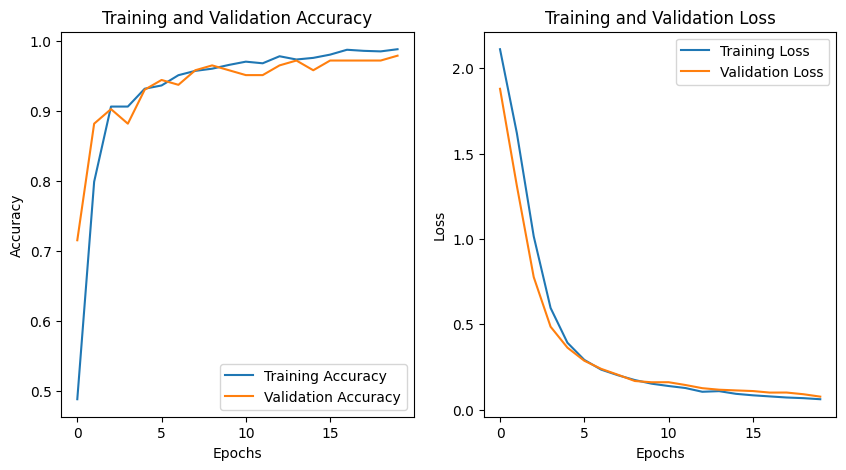

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(history.history['accuracy'], label='Training Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

axs[1].plot(history.history['loss'], label='Training Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()
plt.show()

In [21]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9668 - loss: 0.0813 


In [22]:
model.save('./models/ocr-cnn-prod.keras')

In [30]:
images = data.images 
labels = data.target

In [38]:
a = Image.fromarray(images[1]).convert('L')

In [40]:
a.convert('F')

<PIL.Image.Image image mode=F size=8x8>

In [32]:
from PIL import Image

In [35]:
for i in range(5):
    img = Image.fromarray(aimages[i])  # Convert to PIL Image
    if img.mode != 'L':
        img = img.convert('L')
    img.save(f"./digits/digit_{labels[i]}.png")  # Save the image